In [2]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [3]:
print(tf.__version__)
#tf.config.list_physical_devices("GPU")
#print(device_lib.list_local_devices())

2.14.0


In [4]:
# Create tensors
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [7]:
# Check dimensions
scalar.ndim

0

In [8]:
# Create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [9]:
vector.ndim

1

In [5]:
# Create matrix
matrix = tf.constant([[10,8],[8,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  8],
       [ 8, 10]], dtype=int32)>

In [11]:
matrix.ndim

2

In [12]:
matrix_2 = tf.constant([[1.,2.],[3.,4.],[5,6]], dtype=tf.float16)
matrix_2

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)>

In [13]:
matrix_3 = tf.constant([[[1,2,3], [4,5,6]], [[7,8,9],[10,11,12]], [[13,14,15], [16,17,18]]])
matrix_3

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [14]:
# Create tf.variable
variable = tf.Variable([10.,7.], dtype=tf.float32) # puede Change
constate = tf.Variable([10.,7.], dtype=tf.float32) # No puede Change
variable,constate

(<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([10.,  7.], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([10.,  7.], dtype=float32)>)

In [15]:
# change values in variable
variable[0].assign(7.)
variable

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([7., 7.], dtype=float32)>

In [16]:
# Create random tf
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape=(3,2))

random_2 = tf.random.Generator.from_seed(42)
random_2 = tf.random.normal(shape=(4,2), mean=0.0, stddev=1.1)

In [14]:
no_shuffle = tf.constant([[1,2,3],[4,5,6], [7,8,9]])
print(f"No shuffle: \n{no_shuffle}\nShuffle: \n{tf.random.shuffle(no_shuffle, seed=42)}") 

No shuffle: 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Shuffle: 
[[7 8 9]
 [4 5 6]
 [1 2 3]]


El tf.random.shuffle(seed) trabajo a nivel de las variables

El tf.random.Generator.from_seed Trabajo a nivel global

In [15]:
# Numpy to tf
a = np.arange(start=1, stop=25, step=1,dtype=np.int32) # tf.range(start=1,limit=25,delta=1, dtype=tf.int32)
a_tf = tf.constant(a, shape=[2,3,4])
a,a_tf

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32),
 <tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>)

In [16]:
# shape, rank, size, axis
## Create rank 4
rank_4 = tf.constant(np.arange(0,120,1) ,shape=(2,3,4,5))
print("Datatype of every element:", rank_4.dtype)
print("Number of dimensions (rank):", rank_4.ndim)
print("Shape of tensor:", rank_4.shape)
print("Elements along axis 0 of tensor:", rank_4.shape[0])
print("Elements along last axis of tensor:", rank_4.shape[-1])
print("Total number of elements (2*3*4*5):", tf.size(rank_4).numpy()) # .numpy() converts to NumPy array
print(rank_4)

Datatype of every element: <dtype: 'int64'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 5
Total number of elements (2*3*4*5): 120
tf.Tensor(
[[[[  0   1   2   3   4]
   [  5   6   7   8   9]
   [ 10  11  12  13  14]
   [ 15  16  17  18  19]]

  [[ 20  21  22  23  24]
   [ 25  26  27  28  29]
   [ 30  31  32  33  34]
   [ 35  36  37  38  39]]

  [[ 40  41  42  43  44]
   [ 45  46  47  48  49]
   [ 50  51  52  53  54]
   [ 55  56  57  58  59]]]


 [[[ 60  61  62  63  64]
   [ 65  66  67  68  69]
   [ 70  71  72  73  74]
   [ 75  76  77  78  79]]

  [[ 80  81  82  83  84]
   [ 85  86  87  88  89]
   [ 90  91  92  93  94]
   [ 95  96  97  98  99]]

  [[100 101 102 103 104]
   [105 106 107 108 109]
   [110 111 112 113 114]
   [115 116 117 118 119]]]], shape=(2, 3, 4, 5), dtype=int64)


In [17]:
# Get the first 2 items of each dimension
rank_4[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=int64, numpy=
array([[[[ 0,  1],
         [ 5,  6]],

        [[20, 21],
         [25, 26]]],


       [[[60, 61],
         [65, 66]],

        [[80, 81],
         [85, 86]]]])>

In [18]:
# Get the dimension from each index except for the final one
rank_4[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=int64, numpy=array([[[[0, 1, 2, 3, 4]]]])>

In [19]:
# get first element of each vector
rank_4[:3,:3,:1,:1]

<tf.Tensor: shape=(2, 3, 1, 1), dtype=int64, numpy=
array([[[[  0]],

        [[ 20]],

        [[ 40]]],


       [[[ 60]],

        [[ 80]],

        [[100]]]])>

In [20]:
rank_4[:3,:3,:1,1:2]

<tf.Tensor: shape=(2, 3, 1, 1), dtype=int64, numpy=
array([[[[  1]],

        [[ 21]],

        [[ 41]]],


       [[[ 61]],

        [[ 81]],

        [[101]]]])>

In [21]:
# Create a rank 2 tensor (2 dimensions)
rank_2 = tf.constant([[10, 7], [3, 4]])
rank_2[:, -1] # Get the last item of each row

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [22]:
# Add an extra dimension (to the end)
rank_3 = rank_2[..., tf.newaxis]
rank_2, rank_3

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[10],
         [ 7]],
 
        [[ 3],
         [ 4]]], dtype=int32)>)

In [23]:
tf.expand_dims(rank_2, axis=-1) # "-1" means last axis, "0" first axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

### Manipulating tensors (tensor operations)

In [24]:
# add, multiply and sustraction values
tensor = tf.constant([[10, 7], [3, 4]])
# add, Multiply, sustraction
tensor + 10, tensor * 10 , tensor - 10

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[20, 17],
        [13, 14]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[100,  70],
        [ 30,  40]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 0, -3],
        [-7, -6]], dtype=int32)>)

In [25]:
# Use the tensorflow function equivalent of the '*' (multiply) operator
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [26]:
# Matrix multiplication in tf
tf.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [27]:
tf.linalg.matmul(tensor,tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [28]:
# change type
b_int = tf.constant([1,6,4])
b_float = tf.cast(b_int, dtype=tf.float32)
b_float

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 6., 4.], dtype=float32)>

## Aggregating tensors

In [29]:
c = tf.constant([-7,-10]) # absolute values
tf.abs(c)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

In [30]:
d = tf.constant( tf.random.uniform(shape=[10],minval=0, maxval=1, dtype=tf.float32))
d, tf.size(d), tf.shape(d), d.ndim

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.04161727, 0.9163581 , 0.9513117 , 0.17407024, 0.9355248 ,
        0.9960177 , 0.6597804 , 0.04968703, 0.94308686, 0.7089175 ],
       dtype=float32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=10>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([10], dtype=int32)>,
 1)

In [31]:
tf.reduce_min(d) # find minimum

<tf.Tensor: shape=(), dtype=float32, numpy=0.041617274>

In [32]:
tf.reduce_max(d) # find max

<tf.Tensor: shape=(), dtype=float32, numpy=0.9960177>

In [33]:
tf.reduce_mean(d) # find men

<tf.Tensor: shape=(), dtype=float32, numpy=0.63763714>

In [34]:
tf.reduce_sum(d) # find sum

<tf.Tensor: shape=(), dtype=float32, numpy=6.3763714>

In [35]:
# tf.math.reduce_variance(tf.cast(d,tf.float32)) # find variance
tfp.stats.variance(d) # otra manera de find variance

<tf.Tensor: shape=(), dtype=float32, numpy=0.14079408>

In [36]:
# tf.math.reduce_std(tf.cast(d,tf.float32))  # find std
tfp.stats.stddev(tf.cast(d, tf.float32)) # find std


<tf.Tensor: shape=(), dtype=float32, numpy=0.37522537>

In [37]:
print(f"Position value max: {tf.argmax(d)} \nValue max: {d[tf.argmax(d)]}") # get value max

Position value max: 5 
Value max: 0.9960176944732666


In [38]:
print(f"Position value min: {tf.argmin(d)} \nValue max: {d[tf.argmin(d)]}")

Position value min: 0 
Value max: 0.04161727428436279


In [39]:
# Remove dimension (squeezing)
e = tf.constant( tf.random.uniform(shape=[50]), shape=(1,1,1,1,50))
e.shape

TensorShape([1, 1, 1, 1, 50])

In [40]:
tf.squeeze(e).shape # remove all dimensions

TensorShape([50])

## one-hot encoding

In [41]:
# create list
some_list = [0,1,2,1]
depth = 4
tf.one_hot(some_list,depth=len(some_list))

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)>

In [42]:
# specify custom values for one hot encoding
tf.one_hot(some_list, depth= len(some_list), on_value= "I love", off_value="I bad")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'I love', b'I bad', b'I bad', b'I bad'],
       [b'I bad', b'I love', b'I bad', b'I bad'],
       [b'I bad', b'I bad', b'I love', b'I bad'],
       [b'I bad', b'I love', b'I bad', b'I bad']], dtype=object)>

In [43]:
tf.range(1,10,2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9], dtype=int32)>

In [44]:
tf.range(start=1,limit=10,delta=2, dtype=tf.float32)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 3., 5., 7., 9.], dtype=float32)>

In [45]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# Neural network regression with TensorFlow

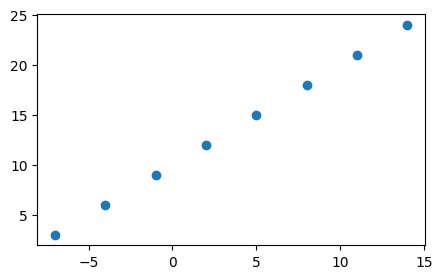

In [46]:
# Create features
x = tf.constant([-7., -4, -1., 2., 5., 8., 11., 14.])

# Create labels
y = tf.constant([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualiza
plt.figure(figsize=(5,3))
plt.scatter(x,y)

In [47]:
# Step model tensorflow
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # 1 output
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit( x= tf.expand_dims(x,axis=-1), y=y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 173ms/step - loss: 21.5990 - mae: 21.5990
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 21.2059 - mae: 21.2059
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 20.8127 - mae: 20.8127
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 20.4475 - mae: 20.4475
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 20.1663 - mae: 20.1663


In [48]:
y_pred = model.predict([17.]) # si x = 17.0, el resultado debia ser cercano a 27.0, model bad
y_pred

1/1 [==============================] - 0s 46ms/step


array([[-23.146778]], dtype=float32)

In [49]:
# improving model, add layers and lr
model = keras.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss= keras.losses.mae, optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])
model.fit( x= tf.expand_dims(input=x, axis=-1), y=y, epochs=100, verbose=0)

In [50]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 44ms/step


array([[26.574635]], dtype=float32)

## add more data

In [3]:
# get data
x = np.arange(start=1, stop=100, step=2, dtype=np.float32)
y = x + 10

In [4]:
# data split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

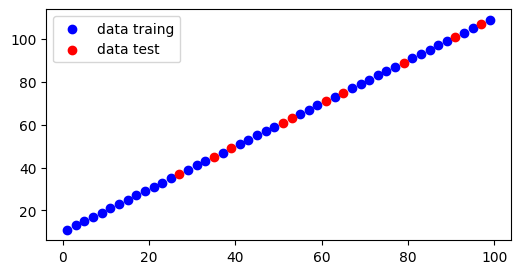

In [5]:
# visualize
plt.figure(figsize=(6,3))
plt.scatter(x_train, y_train, c="b", label="data traing")
plt.scatter(x_test, y_test, c="r", label="data test")
plt.legend();

In [6]:
# buid model
tf.random.set_seed(42)

model_1 = keras.Sequential([
    keras.layers.Dense(input_shape=[1], units=1) # define the input_shape to our model
])
model_1.compile(loss=keras.losses.mae, optimizer=keras.optimizers.SGD(), metrics=["mae"])

model_1.fit(x=x_train, y=y_train, epochs=100, verbose=0)

2024-02-26 20:44:17.359282: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: UNKNOWN ERROR (34)


In [7]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Make predictions
y_preds_1 = model_1.predict(x_test)
y_preds_1

1/1 [==============================] - 0s 40ms/step


array([[ 31.494186],
       [ 91.1903  ],
       [ 70.52626 ],
       [104.96633 ],
       [ 40.678204],
       [111.85434 ],
       [ 61.342243],
       [ 59.046238],
       [ 75.11827 ],
       [ 45.27021 ]], dtype=float32)

In [9]:
# buid model 2
tf.random.set_seed(42)

model_2 = keras.Sequential([
    keras.layers.Dense(input_shape=[1], units=1), 
    keras.layers.Dense(input_shape=[1], units=1)
])
model_2.compile(loss=keras.losses.mae, optimizer=keras.optimizers.SGD(), metrics=["mae"])

model_2.fit(x=x_train, y=y_train, epochs=100, verbose=0)

# build model 3
model_3 = keras.Sequential([
    keras.layers.Dense(input_shape=[1], units=1), # define the input_shape to our model
    keras.layers.Dense(input_shape=[1], units=1)
])
model_3.compile(loss=keras.losses.mae, optimizer=keras.optimizers.SGD(), metrics=["mae"])

model_3.fit(x=x_train, y=y_train, epochs=500, verbose=0)

In [10]:
y_preds_2 = model_2.predict(y_test)
y_preds_3 = model_3.predict(y_test)

1/1 [==============================] - 0s 25ms/step


In [11]:
# get mae and mse
def get_mae_mse(x_test, y_pred):
    value_mae = tf.metrics.mae(x_test, y_pred.squeeze()).numpy()
    value_mse = tf.metrics.mse(x_test, y_pred.squeeze()).numpy()
    return value_mae, value_mse

mae_1, mse_1 = get_mae_mse(x_test=x_test, y_pred=y_preds_1)
mae_2, mse_2 = get_mae_mse(x_test=x_test, y_pred=y_preds_2)
mae_3, mse_3 = get_mae_mse(x_test=x_test, y_pred=y_preds_3)

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]
model_results

[['model_1', 9.348658, 98.35325],
 ['model_2', 8.148363, 100.288734],
 ['model_3', 16.335087, 16.335087]]

In [12]:
def plot_predictions( x_train, y_train, x_test, y_test, predictions):
  
  plt.figure(figsize=(4, 2))
  plt.scatter(x_train, y_train, c="b", label="Training data")
  plt.scatter(x_test, y_test, c="g", label="Testing data")
  plt.scatter(x_test, predictions, c="r", label="Predictions")
  plt.legend()
  plt.axis(False);

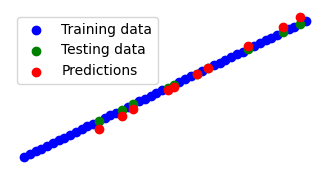

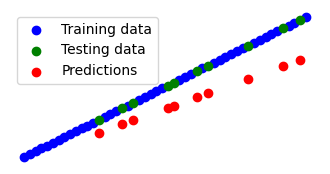

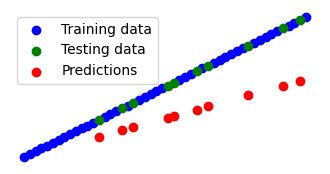

In [13]:
plot_predictions(x_train=x_train,x_test=x_test, y_train=y_train,y_test=y_test, predictions=y_preds_1)
plot_predictions(x_train=x_train, x_test=x_test,y_train=y_train,y_test=y_test, predictions=y_preds_2)
plot_predictions(x_train=x_train, x_test=x_test,y_train=y_train,y_test=y_test, predictions=y_preds_3)

In [134]:
# save best model
model_1.save("./save_model/model_fundaments")
model_1.save("./save_model/model_fundaments.h5")

INFO:tensorflow:Assets written to: ./save_model/model_fundaments/assets


INFO:tensorflow:Assets written to: ./save_model/model_fundaments/assets
/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [135]:
# load model
best_model = keras.models.load_model("./save_model/model_fundaments/")
best_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [136]:
mae_best, mse_best = get_mae_mse( x_test=x_test, y_pred=best_model.predict(x_test))
mae_1 == mae_best, mse_1 == mse_best

1/1 [==============================] - 0s 24ms/step


(True, True)

## Example with large dataset

In [21]:
# Get data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
# tranform data
## column tranform to normalize
ct = make_column_transformer( 
    (MinMaxScaler(), ["age", "bmi", "children"]),        # transform to values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker","region"])
)

x = insurance.drop("charges", axis=1)
y = insurance["charges"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [24]:
# Fit column transformer on the training 
ct.fit(x_train)

# Transform training and test data with OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [25]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [26]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [27]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
x_train_normal.shape, x_train.shape

((1070, 11), (1070, 6))

In [31]:
tf.random.set_seed(42)

model_insurance = keras.Sequential([
    keras.layers.Dense(units=100),
    keras.layers.Dense(units=10),
    keras.layers.Dense(units=1)
])

model_insurance.compile(loss=keras.losses.mae, optimizer=keras.optimizers.Adam(), metrics=["mae"])
history = model_insurance.fit(x=x_train_normal, y=y_train,epochs=100, verbose=0)

In [32]:
# model evaluate
model_loss, model_mae = model_insurance.evaluate(x_test_normal, y_test)
model_loss, model_mae

9/9 [==============================] - 0s 700us/step - loss: 3438.2629 - mae: 3438.2629


(3438.262939453125, 3438.262939453125)

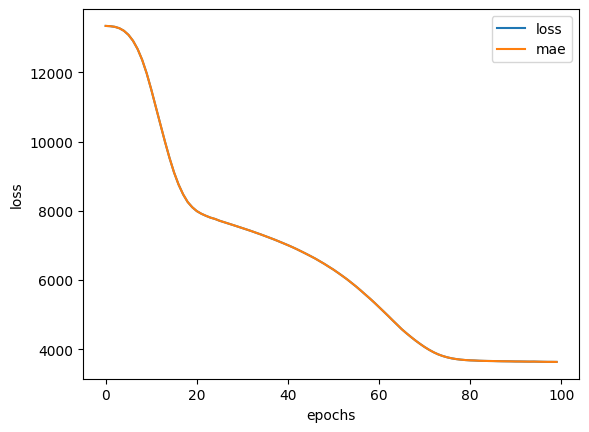

In [34]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss");